# Mini-Project 3

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from src import BlackScholes
import numpy as np

## Call/Put Option Price vs Time and Spot Price

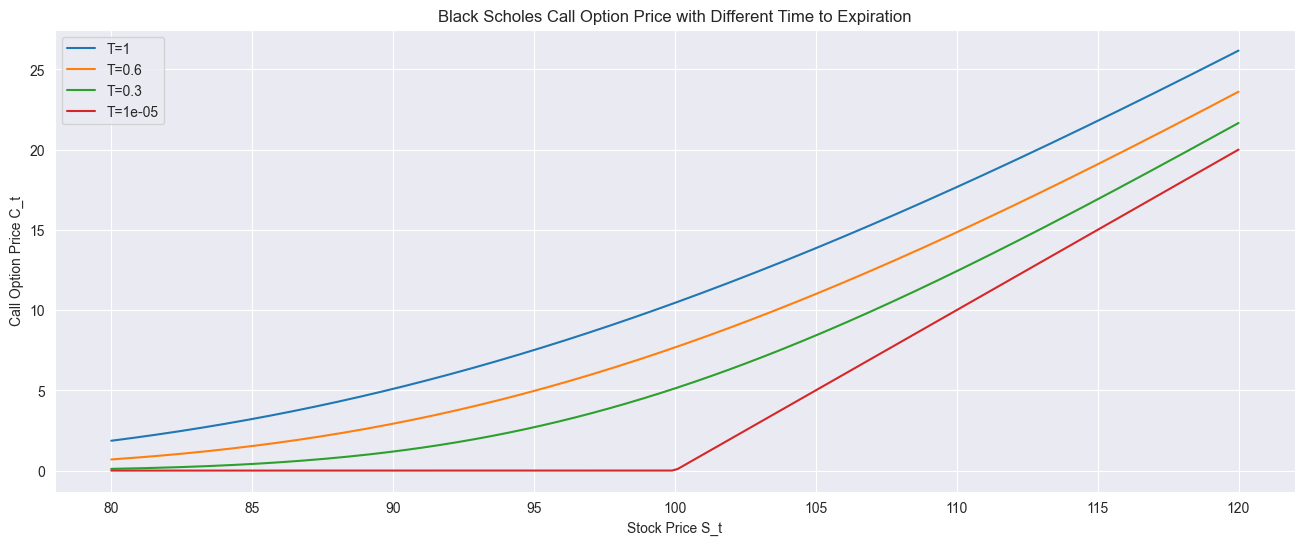

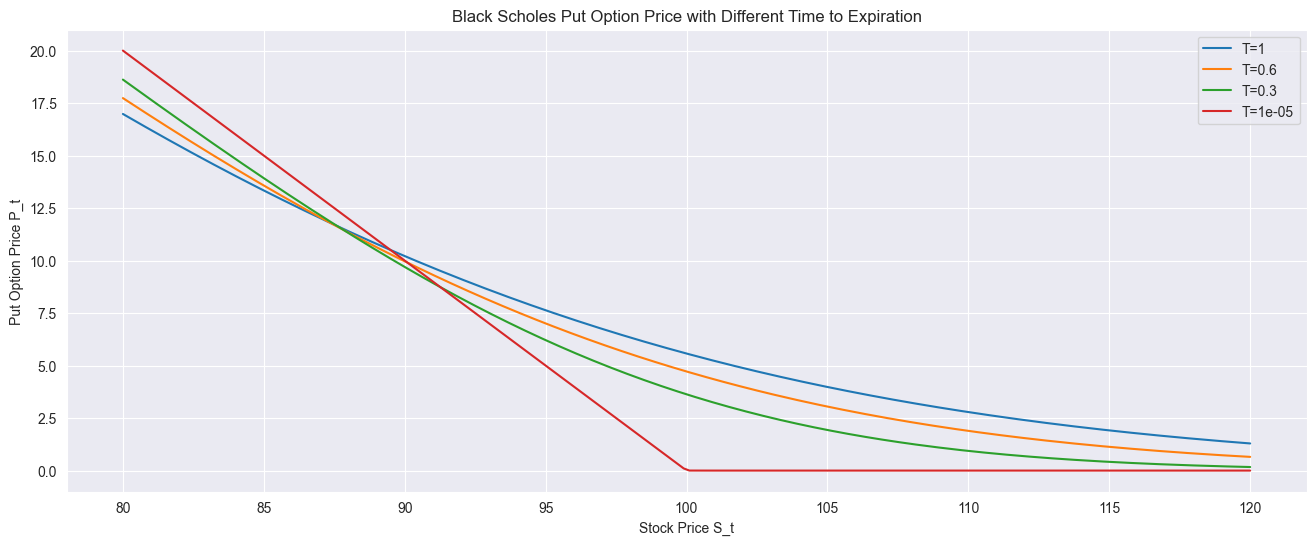

In [27]:
plt.figure(figsize=(16,6))
for T in [1, 0.6, 0.3, 0.00001]:
    S_arr = np.linspace(80, 120, 200)
    C_list = []
    for S in S_arr:
        bs = BlackScholes(S=S, K=100, T=T, r=0.05, sigma=0.2, option_type='call')
        C_list.append(bs.price().item())

    plt.title("Black Scholes Call Option Price with Different Time to Expiration")
    plt.ylabel("Call Option Price C_t")
    plt.xlabel("Stock Price S_t")
    sns.lineplot(x=S_arr, y=C_list, label=f'T={T}')

plt.show()

plt.figure(figsize=(16, 6))
for T in [1, 0.6, 0.3, 0.00001]:
    S_arr = np.linspace(80, 120, 200)
    P_list = []
    for S in S_arr:
        bs = BlackScholes(S=S, K=100, T=T, r=0.05, sigma=0.2, option_type='put')
        P_list.append(bs.price().item())

    plt.title("Black Scholes Put Option Price with Different Time to Expiration")
    plt.ylabel("Put Option Price P_t")
    plt.xlabel("Stock Price S_t")
    sns.lineplot(x=S_arr, y=P_list, label=f'T={T}')

plt.show()

### BS PDE as Inverse Heat Equation
The BS PDE is an inverse heat equation. From the plot above, we observe that at expiration ($\tau=0$), the call option price equals its **intrinsic value**
$\max(S_t-K, 0)$. As $\tau$ (time to expiration) increases, the solution to the BS PDE behaves analogously to an **inverse heat equation**: the initially sharp payoff curve diffuses smoothly over time.

---

### Theta of Call/Put Option
Another key observation is how the option value evolves over calendar time $t$.

For a European **call option**, as $t$ increases and expiry approaches, the **time value** decays, leading to a decrease in price. This is captured by the **Theta**, which is typically negative (always negative when there is no dividend):
$$\Theta_{\text{call}} = \frac{\partial C_t}{\partial t} < 0$$

However, for put options, Theta can be either negative or positive, depending on the strike price, current stock price, and time to expiration. Specifically:
- If the put is **deep in the money**, and interest rates are significant, the Theta can be positive. This is because the holder is almost surely to execute the put option, so the holder are 'owed' the strike later. When time is approaching the expiry, the present value of the strike increase, which benefits the holder.
- If the put is **at or out of the money**, Theta is usually negative. (This is the more common case)
---

### Delta and Gamma of Call/Put Options

From the plot of option price versus spot price, we observe that the **call option price** is an **increasing** and **convex** function of the spot price. In other words, the call option has:

- **Positive Delta**, meaning the option price increases as the spot price increases:
  $$\Delta_{\text{call}} = \frac{\partial C_t}{\partial S_t} > 0$$

- **Positive Gamma**, meaning the rate of change of Delta also increases with the spot price:
  $$\Gamma_{\text{call}} = \frac{\partial^2 C_t}{\partial S_t^2} > 0$$

In contrast, a **put option** has:

- **Negative Delta**, since its value decreases as the spot price increases
- **Positive Gamma**, just like the call — reflecting the convexity of the price curve

These relationships can be understood through the **Put–Call Parity** identity:
$$C_t - P_t = S_t e^{-\delta(T - t)} - K e^{-r(T - t)}$$

Differentiating both sides with respect to the spot price \( S_t \) gives:
$$\Delta_{\text{call}} - \Delta_{\text{put}} = e^{-\delta(T - t)}$$

And differentiating again confirms the symmetry in curvature:
$$\Gamma_{\text{call}} = \Gamma_{\text{put}}$$

So while call and put options differ in directional sensitivity (Delta), they share the same second-order sensitivity (Gamma), which reflects the universal convexity of option prices with respect to the underlying.


## Option Price vs Volatility

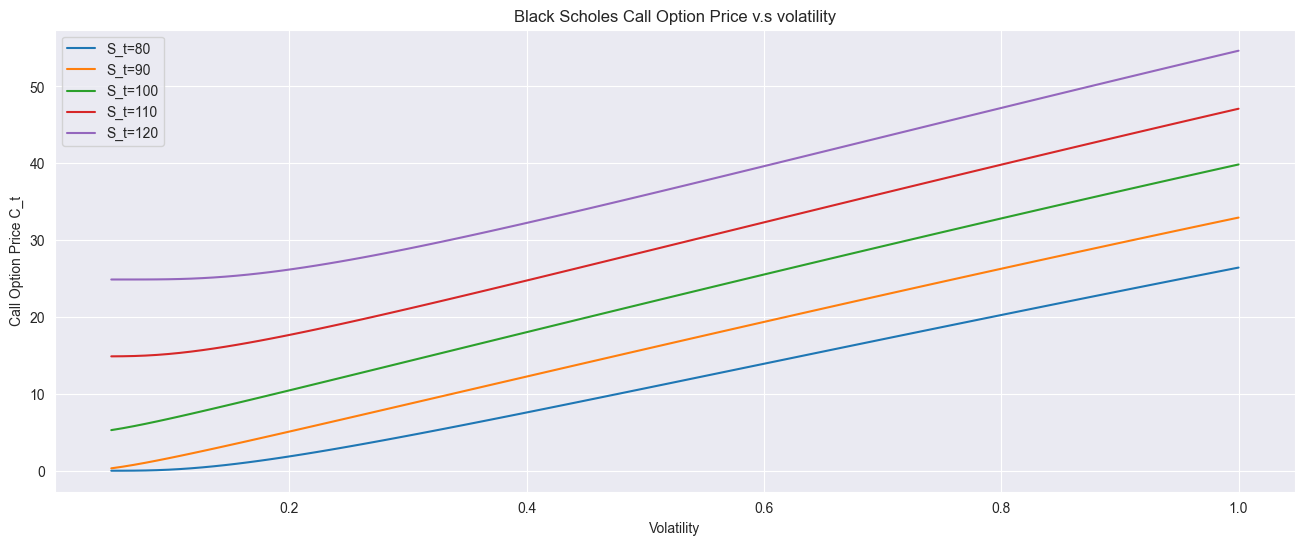

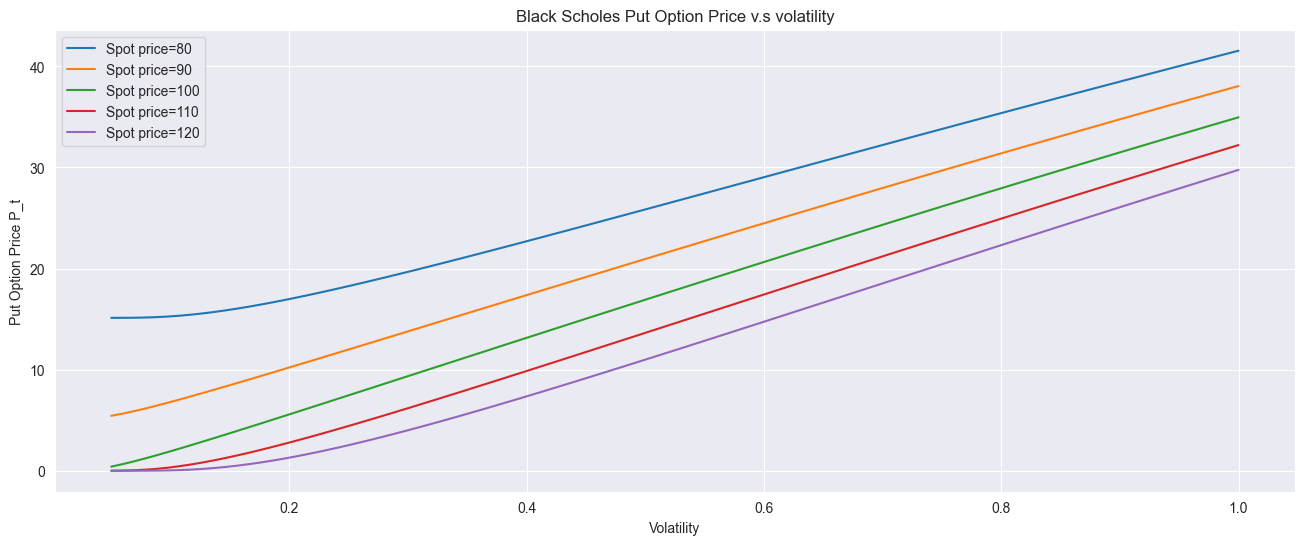

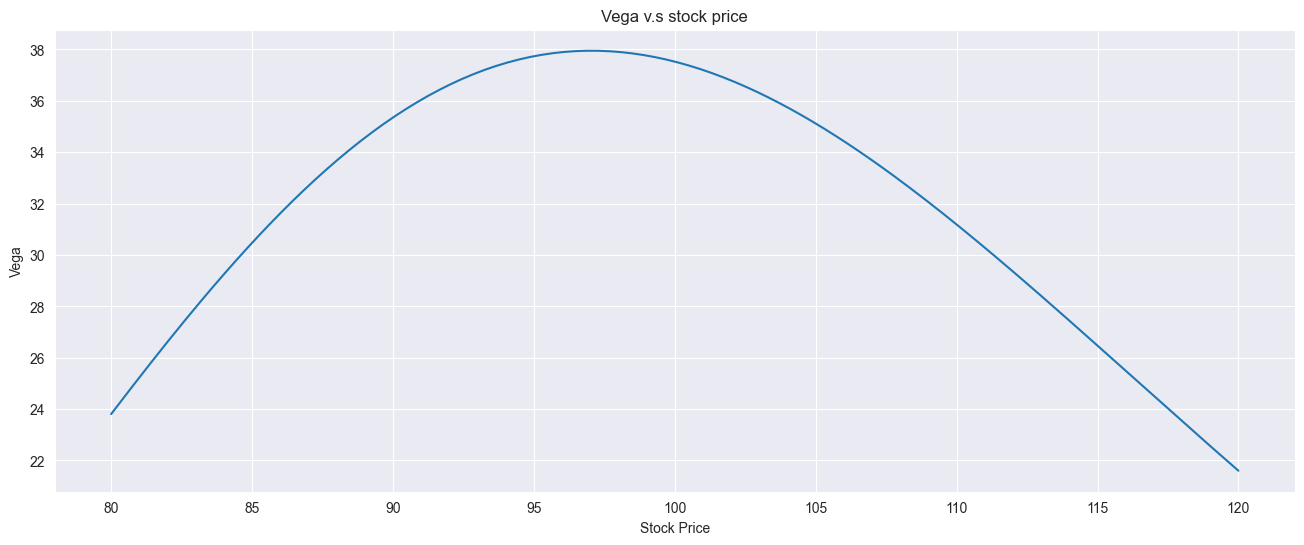

In [15]:
plt.figure(figsize=(16,6))
for S in [80, 90, 100, 110, 120]:
    sigma_list = np.linspace(0.05, 1, 100)
    C_list = []
    for sigma in sigma_list:
        bs = BlackScholes(S=S, K=100, T=1, r=0.05, sigma=sigma, option_type='call')
        C_list.append(bs.price().item())

    plt.title("Black Scholes Call Option Price v.s volatility")
    plt.ylabel("Call Option Price C_t")
    plt.xlabel("Volatility")
    sns.lineplot(x=sigma_list, y=C_list, label=f'S_t={S}')

plt.show()

plt.figure(figsize=(16,6))
for S in [80, 90, 100, 110, 120]:
    sigma_list = np.linspace(0.05, 1, 100)
    C_list = []
    for sigma in sigma_list:
        bs = BlackScholes(S=S, K=100, T=1, r=0.05, sigma=sigma, option_type='put')
        C_list.append(bs.price().item())

    plt.title("Black Scholes Put Option Price v.s volatility")
    plt.ylabel("Put Option Price P_t")
    plt.xlabel("Volatility")
    sns.lineplot(x=sigma_list, y=C_list, label=f'Spot price={S}')

plt.show()

plt.figure(figsize=(16,6))
S_list = np.linspace(80, 120, 200)
vega_list = []
for S in S_list:
    bs = BlackScholes(S=S, K=100, T=1, r=0.05, sigma=0.2 ,option_type='call')
    vega_list.append(bs.vega().item())
plt.title("Vega v.s stock price")
plt.ylabel("Vega")
plt.xlabel("Stock Price")
sns.lineplot(x=S_list, y=vega_list)
plt.show()

### Vega of Options

The **Vega** of an option measures its sensitivity to changes in the volatility of the underlying asset. As observed from the plots above, the Vega of both **call** and **put** options is **positive**, and in fact, they are **equal** — a result that can be derived from the **put-call parity**:

$$\nu_\text{call} = \nu_\text{put} > 0$$

- One intuitive way to understand this is that options act like **insurance** against market movements. When the market becomes more volatile (i.e., riskier), the "price of insurance" — that is, the option premium — naturally increases.
- Another perspective comes from the **asymmetric payoff** structure of options: both calls and puts allow for substantial gains in one direction while capping losses in the other. Higher volatility increases the probability of large favorable price moves, which raises the expected payoff, while the downside remains limited. This asymmetry makes options more valuable in volatile markets.

### Vega Peak for ATM options

We also observe that **Vega reaches its peak when the option is at-the-money (ATM)**. At this point, the uncertainty of whether the option will expire in or out of the money is highest. Even small changes in volatility can significantly affect the probability distribution of terminal prices, and thus the option's value.

In contrast, when an option is **deep in-the-money (DITM)** or **deep out-of-the-money (DOTM)**, the outcome is almost certain — the option will either almost surely be exercised or expire worthless. In those cases, changes in volatility have relatively little effect on the option's value, resulting in lower Vega.
